In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

issues = pd.read_csv('Issue Data.csv', encoding='latin-1').filter(items=[
    'repo_id', 'id', 'body', 'comments', 'labels', 'number', 'title','locked', 'state'])
issues

,repo_id,id,body,comments,labels,number,title,locked,state
0,28027226,184325122,Consider switching back to classes like OpenGL...,0,"[Label(name=""enhancement"")]",14,Back to multiple platform-specific impl classes,False,closed
1,28027226,126477054,This just breaks iterators,0,[],13,Impossible to add/remove components/nodes insi...,False,closed
2,28027226,125155660,Make sure factory methods and friends' stuff m...,0,"[Label(name=""enhancement"")]",12,Factory methods,False,closed
3,28027226,115748487,NaN,0,"[Label(name=""bug"")]",11,Finish with Skybox as a fully built-in component,False,closed
4,28027226,115746573,"Now it is `solo.EnumType_EnumValue`, should be...",0,"[Label(name=""enhancement"")]",10,Rename script enums,False,closed
...,...,...,...,...,...,...,...,...,...
29894,7431427,10794019,"Used for bullet/explosion marks, player foot s...",4,"[Label(name=""enhancement""), Label(name=""render...",5,Add WolfET Decal Projector code,False,closed
29895,7431427,10793969,NaN,1,"[Label(name=""engine""), Label(name=""enhancement"")]",4,Support Sending Server Game Stats to Master Se...,False,open
29896,7431427,10793903,NaN,1,"[Label(name=""enhancement"")]",3,Add Demo State Cgame System Calls,False,closed
29897,7431427,10793844,NaN,6,"[Label(name=""enhancement""), Label(name=""gameco...",2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed


In [2]:
pr = pd.read_csv('Pull Requests Data.csv', encoding='latin-1').filter(items=[
    'repo_id', 'id', 'additions', 'body', 'comments', 'commits', 'deletions', 'merged', 'labels', 'number', 'title', 'state'])
pr

,repo_id,id,additions,body,comments,commits,deletions,merged,labels,number,title,state
0,203122320,347388722,0,## Beep boop. Your images are optimized!\r \r ...,0,1,0,True,[],5,[ImgBot] Optimize images,closed
1,203122320,332320269,0,## Beep boop. Your images are optimized!\r \r ...,0,1,0,True,[],4,[ImgBot] Optimize images,closed
2,203122320,330696289,0,## Beep boop. Your images are optimized!\r \r ...,0,1,0,True,[],3,[ImgBot] Optimize images,closed
3,203122320,323221687,0,## Beep boop. Your images are optimized!\r \r ...,0,1,0,True,[],2,[ImgBot] Optimize images,closed
4,203122320,310635861,1,-- new model heart of the core,1,1,0,True,[],1,Create craters. js,closed
...,...,...,...,...,...,...,...,...,...,...,...,...
20155,7431427,352889789,6710,This PR will update the current opus libraries...,0,2,1214,False,[],303,Opus library update (0.11 and 1.3.1).,closed
20156,7431427,145277112,1,Now the `sed` command copes with files using W...,1,1,1,False,[],279,Fix compiling renderergl2's GLSL shaders as C ...,closed
20157,7431427,18145967,3,I wasn't able to compile spearmint under Windo...,1,1,3,True,[],195,Fix Win32 compilation issue in Sys_StatFile,closed
20158,7431427,16462745,7,Fixes #63,2,1,53,False,[],187,spearmint: Remove references of PERS_SCORE in ...,closed


In [3]:
import re

issues['title_processed'] = issues['title'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

issues['title_processed'] = issues['title_processed'].map(lambda x: x.lower())


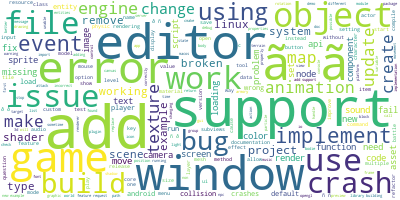

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(issues['title_processed'].values.tolist())
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', '³a', 'ªa', '¼a','¹a', 're', 'edu', 'use', 'game',
                  'fix', 'add', 'error', 'support', 'new', 'api', 'issues', 'ã'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = [*issues.title_processed.values.tolist()]
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['back', 'multiple', 'platform', 'specific', 'impl', 'classes']


In [6]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [7]:
from pprint import pprint
num_topics = 20
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=162526)
pprint(lda_model.print_topics(num_topics=5))
doc_lda = lda_model[corpus]

[(17,
  '0.012*"crash" + 0.011*"editor" + 0.009*"using" + 0.007*"build" + '
  '0.006*"bug" + 0.006*"windows" + 0.006*"custom" + 0.006*"work" + '
  '0.006*"object" + 0.006*"issue"'),
 (10,
  '0.011*"editor" + 0.010*"change" + 0.009*"opengl" + 0.007*"window" + '
  '0.007*"render" + 0.006*"crash" + 0.005*"system" + 0.005*"shader" + '
  '0.004*"map" + 0.004*"screen"'),
 (5,
  '0.016*"editor" + 0.008*"debug" + 0.008*"engine" + 0.008*"missing" + '
  '0.006*"entity" + 0.005*"mode" + 0.005*"custom" + 0.005*"window" + '
  '0.005*"name" + 0.004*"load"'),
 (13,
  '0.011*"rendering" + 0.008*"bug" + 0.008*"build" + 0.008*"map" + '
  '0.007*"windows" + 0.006*"editor" + 0.006*"file" + 0.006*"allow" + '
  '0.006*"render" + 0.005*"work"'),
 (14,
  '0.011*"editor" + 0.010*"crash" + 0.010*"implement" + 0.007*"window" + '
  '0.006*"node" + 0.006*"animation" + 0.006*"battle" + 0.006*"example" + '
  '0.006*"system" + 0.005*"work"')]


In [8]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\gabre\AppData\Roaming\Python\Python38\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12    -0.021127  0.005747       1        1  5.587028
0     -0.032915 -0.002297       2        1  5.562199
17    -0.020895 -0.007765       3        1  5.512957
1     -0.004954  0.077458       4        1  5.402415
19    -0.000104  0.089698       5        1  5.264188
13     0.021931  0.017285       6        1  5.256255
9     -0.052507 -0.013891       7        1  5.230082
6      0.052526 -0.009777       8        1  5.008948
14    -0.015924  0.036570       9        1  4.933498
8     -0.003070  0.045995      10        1  4.923162
18     0.045394 -0.005555      11        1  4.872527
3     -0.002732 -0.035877      12        1  4.854477
11    -0.051617 -0.036656      13        1  4.825965
2     -0.045487 -0.057740      14        1  4.794296
4      0.016496  0.072722      15        1  4.764911
10     0.034166 -0.001169      16        1  4.761510
5     -0.052595 -0.029313      17        1  4.739497
7     -0.055407 -0.045383      18        1  4.645478
16     0.079136 -0.058895      19        1  4.530385
15     0.109682 -0.041158      20        1  4.530220, topic_info=         Term         Freq        Total Category  logprob  loglift
456    editor  1510.000000  1510.000000  Default  30.0000  30.0000
697       bug   558.000000   558.000000  Default  29.0000  29.0000
455     crash   545.000000   545.000000  Default  28.0000  28.0000
178    system   490.000000   490.000000  Default  27.0000  27.0000
173   objects   280.000000   280.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
599   android    18.685150   277.675732  Topic20  -5.7668   0.3957
200    engine    22.123787   613.425080  Topic20  -5.5979  -0.2280
3    multiple    16.682599   206.737766  Topic20  -5.8802   0.5773
484   missing    16.684564   255.355652  Topic20  -5.8801   0.3662
456    editor    21.247379  1510.340307  Topic20  -5.6383  -1.1695

[1510 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
15710      4  0.893170      aas
596        1  0.010092  ability
596        2  0.020184  ability
596        3  0.040369  ability
596        4  0.070646  ability
...      ...       ...      ...
4531      19  0.062389       ¾a
5199       4  0.549230    ðºð¾n
5199       7  0.109846    ðºð¾n
5199      16  0.109846    ðºð¾n
5199      20  0.109846    ðºð¾n

[7120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 1, 18, 2, 20, 14, 10, 7, 15, 9, 19, 4, 12, 3, 5, 11, 6, 8, 17, 16])

In [9]:
for i in lda_model.show_topics(num_topics=1, num_words=6):
    print(i)

(2, '0.010*"editor" + 0.007*"remove" + 0.006*"file" + 0.005*"entity" + 0.005*"code" + 0.005*"camera"')


In [10]:
lda_model.get_topic_terms(1)


[(173, 0.010229212),
 (178, 0.0075322716),
 (456, 0.0075305873),
 (199, 0.00748759),
 (124, 0.0071269074),
 (163, 0.006297544),
 (200, 0.005673074),
 (664, 0.005166698),
 (65, 0.0049270843),
 (207, 0.0046772603)]

In [11]:
topics = []
for i in lda_model.show_topics(num_topics=num_topics, num_words=6):
    aux = i[1].split('+')
    topic = []
    for j in aux:
        topic.append(j.split('*')[1].replace('"', '').replace(' ', ''))
    topics.append(topic)

topics
print(len(topics))


20


In [12]:
issues['topic'] = [-1] * 29899
issues

,repo_id,id,body,comments,labels,number,title,locked,state,title_processed,topic
0,28027226,184325122,Consider switching back to classes like OpenGL...,0,"[Label(name=""enhancement"")]",14,Back to multiple platform-specific impl classes,False,closed,back to multiple platform-specific impl classes,-1
1,28027226,126477054,This just breaks iterators,0,[],13,Impossible to add/remove components/nodes insi...,False,closed,impossible to add/remove components/nodes insi...,-1
2,28027226,125155660,Make sure factory methods and friends' stuff m...,0,"[Label(name=""enhancement"")]",12,Factory methods,False,closed,factory methods,-1
3,28027226,115748487,NaN,0,"[Label(name=""bug"")]",11,Finish with Skybox as a fully built-in component,False,closed,finish with skybox as a fully built-in component,-1
4,28027226,115746573,"Now it is `solo.EnumType_EnumValue`, should be...",0,"[Label(name=""enhancement"")]",10,Rename script enums,False,closed,rename script enums,-1
...,...,...,...,...,...,...,...,...,...,...,...
29894,7431427,10794019,"Used for bullet/explosion marks, player foot s...",4,"[Label(name=""enhancement""), Label(name=""render...",5,Add WolfET Decal Projector code,False,closed,add wolfet decal projector code,-1
29895,7431427,10793969,NaN,1,"[Label(name=""engine""), Label(name=""enhancement"")]",4,Support Sending Server Game Stats to Master Se...,False,open,support sending server game stats to master se...,-1
29896,7431427,10793903,NaN,1,"[Label(name=""enhancement"")]",3,Add Demo State Cgame System Calls,False,closed,add demo state cgame system calls,-1
29897,7431427,10793844,NaN,6,"[Label(name=""enhancement""), Label(name=""gameco...",2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed,merge rtcw/wolfet dynamic light and corona code,-1


In [13]:
import re
for i in range(len(issues['title'])):
    find = False
    for j in range(len(topics)):
        words_re = re.compile("|".join(topics[j]))
        if not find :
            if words_re.search(str(issues['title'][i])):
                issues.at[i, 'topic'] = j
                find = True


In [14]:
issues

,repo_id,id,body,comments,labels,number,title,locked,state,title_processed,topic
0,28027226,184325122,Consider switching back to classes like OpenGL...,0,"[Label(name=""enhancement"")]",14,Back to multiple platform-specific impl classes,False,closed,back to multiple platform-specific impl classes,-1
1,28027226,126477054,This just breaks iterators,0,[],13,Impossible to add/remove components/nodes insi...,False,closed,impossible to add/remove components/nodes insi...,2
2,28027226,125155660,Make sure factory methods and friends' stuff m...,0,"[Label(name=""enhancement"")]",12,Factory methods,False,closed,factory methods,-1
3,28027226,115748487,NaN,0,"[Label(name=""bug"")]",11,Finish with Skybox as a fully built-in component,False,closed,finish with skybox as a fully built-in component,-1
4,28027226,115746573,"Now it is `solo.EnumType_EnumValue`, should be...",0,"[Label(name=""enhancement"")]",10,Rename script enums,False,closed,rename script enums,-1
...,...,...,...,...,...,...,...,...,...,...,...
29894,7431427,10794019,"Used for bullet/explosion marks, player foot s...",4,"[Label(name=""enhancement""), Label(name=""render...",5,Add WolfET Decal Projector code,False,closed,add wolfet decal projector code,2
29895,7431427,10793969,NaN,1,"[Label(name=""engine""), Label(name=""enhancement"")]",4,Support Sending Server Game Stats to Master Se...,False,open,support sending server game stats to master se...,-1
29896,7431427,10793903,NaN,1,"[Label(name=""enhancement"")]",3,Add Demo State Cgame System Calls,False,closed,add demo state cgame system calls,-1
29897,7431427,10793844,NaN,6,"[Label(name=""enhancement""), Label(name=""gameco...",2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed,merge rtcw/wolfet dynamic light and corona code,2


In [15]:
issues.query('topic != -1').count()

repo_id            13740
id                 13740
body               12329
comments           13740
labels             13740
number             13740
title              13740
locked             13740
state              13740
title_processed    13740
topic              13740
dtype: int64

In [16]:
issues.describe()

,repo_id,id,comments,number,topic
count,2.989900e+04,2.989900e+04,29899.000000,29899.000000,29899.000000
mean,6.748916e+07,3.755877e+08,2.762066,374.526874,1.798288
std,6.776820e+07,2.124645e+08,5.487790,456.576283,4.772826
min,1.182756e+06,1.326569e+06,0.000000,1.000000,-1.000000
25%,1.431899e+07,2.023521e+08,0.000000,54.000000,-1.000000
50%,4.520265e+07,3.722620e+08,1.000000,188.000000,-1.000000
75%,1.053816e+08,5.533272e+08,3.000000,531.000000,3.000000
max,3.290342e+08,7.957906e+08,246.000000,2446.000000,19.000000


In [17]:
topics = pd.DataFrame({'id': [], 'Word 1': [], 'Prob 1': [], 'Word 2': [], 'Prob 2': [
], 'Word 3': [], 'Prob 3': [], 'Word 4': [], 'Prob 4': [], 'Word 5': [], 'Prob 5': [], 'Word 6': [], 'Prob 6': []})
topics

,id,Word 1,Prob 1,Word 2,Prob 2,Word 3,Prob 3,Word 4,Prob 4,Word 5,Prob 5,Word 6,Prob 6


In [18]:
for i in lda_model.show_topics(num_topics=num_topics, num_words=6):
    words = i[1].split('+')
    words = [j.split('*') for j in words]
    topics = topics.append({'id': int(i[0]), 'Word 1': words[0][1].replace('"', '').replace(' ', ''), 'Prob 1': float(words[0][0].replace(' ', '')),
                            'Word 2': words[1][1].replace('"', '').replace(' ', ''), 'Prob 2': float(words[1][0].replace(' ', '')),
                            'Word 3': words[2][1].replace('"', '').replace(' ', ''), 'Prob 3': float(words[2][0].replace(' ', '')),
                            'Word 4': words[3][1].replace('"', '').replace(' ', ''), 'Prob 4': float(words[3][0].replace(' ', '')),
                            'Word 5': words[4][1].replace('"', '').replace(' ', ''), 'Prob 5': float(words[4][0].replace(' ', '')),
                            'Word 6': words[5][1].replace('"', '').replace(' ', ''), 'Prob 6': float(words[5][0].replace(' ', ''))}, ignore_index=True)

topics.set_index('id', inplace=True)
topics


,Word 1,Prob 1,Word 2,Prob 2,Word 3,Prob 3,Word 4,Prob 4,Word 5,Prob 5,Word 6,Prob 6
id,,,,,,,,,,,,
0.0,editor,0.020,crash,0.013,make,0.008,project,0.008,using,0.007,work,0.007
1.0,objects,0.010,system,0.008,editor,0.008,crashes,0.007,animation,0.007,object,0.006
2.0,editor,0.010,remove,0.007,file,0.006,entity,0.005,code,0.005,camera,0.005
3.0,editor,0.010,camera,0.006,files,0.005,issue,0.005,problem,0.005,update,0.005
4.0,build,0.009,bug,0.008,editor,0.007,linux,0.007,engine,0.006,create,0.006
5.0,editor,0.016,debug,0.008,engine,0.008,missing,0.008,entity,0.006,mode,0.005
6.0,build,0.008,engine,0.008,work,0.006,animation,0.006,texture,0.006,move,0.006
7.0,editor,0.018,objects,0.006,file,0.005,scene,0.005,demo,0.005,engine,0.005
8.0,system,0.014,editor,0.013,mode,0.007,bug,0.006,work,0.006,input,0.006


In [19]:
topics.describe()

,Prob 1,Prob 2,Prob 3,Prob 4,Prob 5,Prob 6
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.013550,0.008700,0.007200,0.006550,0.005950,0.005700
std,0.005073,0.001976,0.001508,0.001099,0.000826,0.000657
min,0.007000,0.006000,0.005000,0.005000,0.005000,0.005000
25%,0.010000,0.007750,0.006000,0.005750,0.005000,0.005000
50%,0.011500,0.008000,0.007000,0.007000,0.006000,0.006000
75%,0.016250,0.010000,0.008000,0.007000,0.007000,0.006000
max,0.025000,0.013000,0.010000,0.008000,0.007000,0.007000


In [20]:
issues.to_csv('Issue Data Topic.csv', index=False)


In [21]:
topics.to_csv('Topics.csv', index=False)